In [67]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [69]:
 # Make a reference to the books.csv file path
file = "AB/NBA_Shooting_Stats_1984-2019.csv"

# Import the books.csv file as a DataFrame
df = pd.read_csv(file, encoding="utf-8")
df.set_index('SEASON')
df.head()

,SEASON,ERA,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1984-85,1985-89,1,Bernard King,55,37.5,32.9,12.6,23.7,53.0,...,10.0,77.2,2.1,3.7,5.8,3.7,1.3,0.3,3.7,26.8
1,1984-85,1985-89,2,Larry Bird,80,39.5,28.7,11.5,22.0,52.2,...,5.7,88.2,2.1,8.5,10.5,6.6,1.6,1.2,3.1,34.4
2,1984-85,1985-89,3,Michael Jordan,82,38.3,28.2,10.2,19.8,51.5,...,9.1,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,29.2
3,1984-85,1985-89,4,Purvis Short,78,39.5,28.0,10.5,22.8,46.0,...,7.9,81.7,2.0,3.1,5.1,3.0,1.5,0.3,3.1,21.1
4,1984-85,1985-89,5,Alex English,81,36.1,27.9,11.6,22.4,51.8,...,5.7,82.9,2.5,3.1,5.7,4.2,1.2,0.6,3.1,24.8


In [70]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df.FGM.values.reshape(-1, 1)
y = df.FGA.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (7120, 1) (7120, 1)


array([[12.6],
       [11.5],
       [10.2],
       ...,
       [ 1.1],
       [ 1.1],
       [ 1.2]])

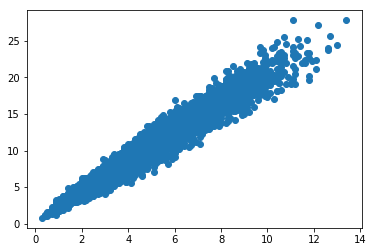

In [71]:
plt.scatter(X, y)

In [72]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [73]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[2.02998185]]
y-axis intercept:  [0.53544174]


In [75]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.3]]
Max X Value: [[13.4]]


In [76]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

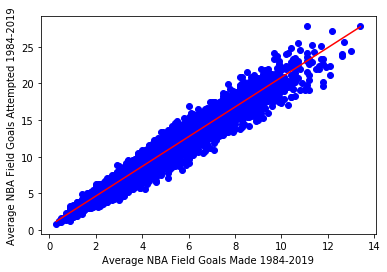

In [77]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.xlabel("Average NBA Field Goals Made 1984-2019")
plt.ylabel("Average NBA Field Goals Attempted 1984-2019")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [78]:
 # Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [79]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [80]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 0.9634914435667814
R-squared (R2 ): 0.9544526374439788


In [82]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.9544526374439788

In [98]:
import seaborn as sns
df.dropna()
df.drop(['SEASON'], axis=1)
df.head()

,SEASON,ERA,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1984-85,1985-89,55,37.5,32.9,12.6,23.7,53.0,0.0,0.2,...,10.0,77.2,2.1,3.7,5.8,3.7,1.3,0.3,3.7,26.8
1,1984-85,1985-89,80,39.5,28.7,11.5,22.0,52.2,0.7,1.6,...,5.7,88.2,2.1,8.5,10.5,6.6,1.6,1.2,3.1,34.4
2,1984-85,1985-89,82,38.3,28.2,10.2,19.8,51.5,0.1,0.6,...,9.1,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,29.2
3,1984-85,1985-89,78,39.5,28.0,10.5,22.8,46.0,0.6,1.9,...,7.9,81.7,2.0,3.1,5.1,3.0,1.5,0.3,3.1,21.1
4,1984-85,1985-89,81,36.1,27.9,11.6,22.4,51.8,0.0,0.1,...,5.7,82.9,2.5,3.1,5.7,4.2,1.2,0.6,3.1,24.8


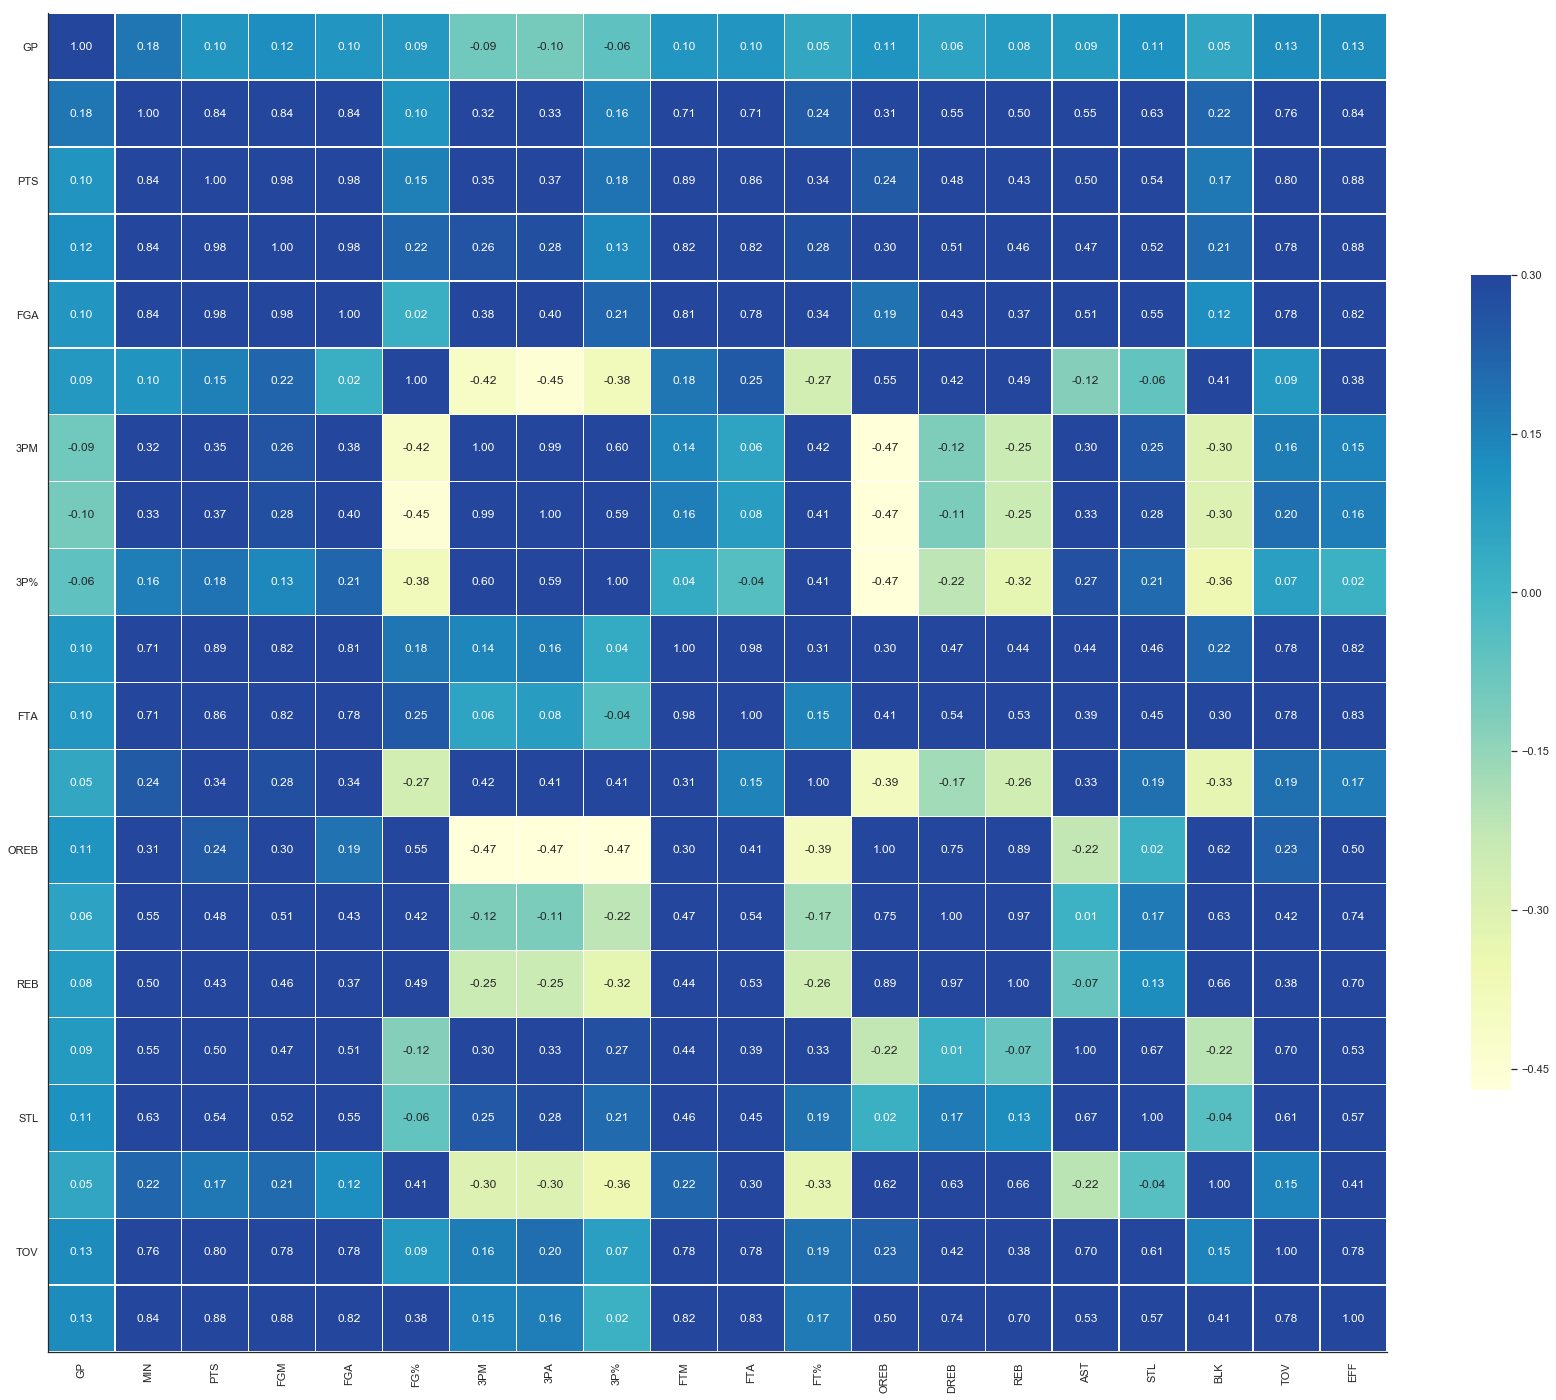

In [99]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='YlGnBu')
sns.despine()
g.figure.set_size_inches(30,30)
plt.show()